# Topic 1 Week 1 Thursday Activity (1/4/2022)
by Andrew Esch


CST-425


## Goal: Demonstrate Linear Modeling and finding Maximum Likelihood
### What is a linear model?
A linear model is a graph displays data points from the relation of two variables. It also displays a line that predicts that best approximates the set of points and shows the two variables' correlation. There are several models that can predict values for the set of data.

### What is a Maximum Likelihood Estimator?
The maximum likelihood estimator is a method of estimating the parameters of a probability density function. Intuitively, it estimates the likelihood of an observation on the graph and displays which value is the most likely to occur.

## Code & Data
The below code uses the Urban Land Cover dataset from UCI's machine learning dataset to demonstrate a linear model and Maximum Likelihood Estimation. All sources are documented at the end of the notebook.

In [21]:
import statistics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Get Urban Land Model Data
urbanDF = pd.read_csv("testing.csv")
urbanDF.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


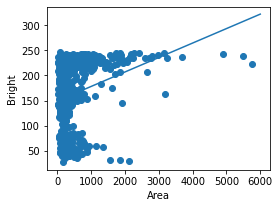

In [34]:
# Find a linear model, comparing two variables to each other
# Compare Area to Bright to determine how correlated brightness is to area
x = np.array(urbanDF["Area"]).reshape((-1,1))
y = np.array(urbanDF["Bright"])

linearModel = LinearRegression()
linearModel.fit(x, y)

# Create a linear regression line
x_new = np.linspace(0, 6000, 500) # Define linear space for x parameters that account for the regression line
y_new = linearModel.predict(x_new[:, np.newaxis]) # Predict y-values for given x linear space

# Define plot variables
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)

# Set axis labels
ax.set_xlabel('Area')
ax.set_ylabel('Bright')

# Define axis type
ax.axis('tight')

# Show linear model
plt.show()

c:\users\andre\pycharmprojects\cst-425\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


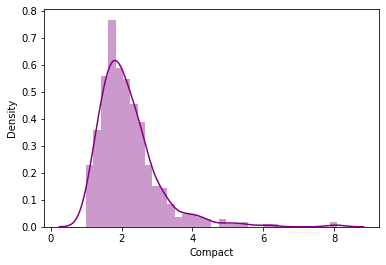

In [35]:
# Moreover, we can use a histogram with a density curve to find the maximum likelihood of Compact
# This will require ML, so use the Seaborn library to generate a probability distribution curve
import seaborn as sns
sns.distplot(a=urbanDF["Compact"], kde=True, color="purple")
plt.show()

## Sources
https://archive.ics.uci.edu/ml/datasets/Urban+Land+Cover
https://www.tutorialspoint.com/linear-regression-with-matplotlib-numpy
https://seaborn.pydata.org/generated/seaborn.distplot.html